In [1]:
import cv2
import os
import skimage
from skimage import data
from skimage import transform
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
from random import randint
import tensorflow as tf
from scipy import ndimage, misc
from skimage.transform import rotate

In [2]:
HEIGHT=112
WIDTH=56
size_of_image_name=str(HEIGHT)+'*'+str(WIDTH)

class_number = 32
class_image_number =1
NUMBEROFIMAGE_DATA = class_number * class_image_number
totalImages = 0

In [3]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) if f.endswith(".jpg")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(str(d))
    return images, labels

In [4]:
ROOT_PATH = '/home/tang/targa/exp4/'
load_data_directory = os.path.join(ROOT_PATH, "trainingOriginal/trainSimple"+size_of_image_name)
#train_data_directory = os.path.join(ROOT_PATH, "size160*80/train")
#test_data_directory = os.path.join(ROOT_PATH, "size160*80/test")

total_data_directory = os.path.join(ROOT_PATH, "generateNewData/lightGeneration/size"+size_of_image_name+"/total_data")
if not os.path.exists(total_data_directory):
    os.makedirs(total_data_directory)

In [5]:
Images,Labels = load_data(load_data_directory)

In [6]:
print("- load-set:\t\t{}".format(len(Labels)))

- load-set:		32


In [7]:
for label in Labels:
    label_directory = os.path.join(total_data_directory, label)
    if not os.path.exists(label_directory):
        os.makedirs(label_directory)

In [8]:
#hsv
from skimage import data, exposure, img_as_float

i=0
for p in range(0,NUMBEROFIMAGE_DATA):
    img = Images[i]
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    for j in range(0,20):
        turn_green_hsv = img_hsv.copy()
        MIN = np.min(turn_green_hsv[:,:,0])
        MAX = np.max(turn_green_hsv[:,:,0])
        random_factor = random.uniform(-MIN,255-MAX)
        turn_green_hsv[:, :, 0] = turn_green_hsv[:, :, 0]+random_factor
        turn_green_img = cv2.cvtColor(turn_green_hsv, cv2.COLOR_HSV2BGR)
        factor = str(int(random_factor))
        filename=total_data_directory+'/'+Labels[i]+'/'+str(Labels[i])+ 'h_'+'_'+factor+'.jpg'
        plt.imsave(filename, turn_green_img)
        totalImages = 1 + totalImages
        #print(filename)
    i+=1
print(totalImages)

640


In [9]:
np.max(turn_green_hsv[:,:,1])

255

In [10]:
#hsv
from skimage import data, exposure, img_as_float

i=0
for p in range(0,NUMBEROFIMAGE_DATA):
    img = Images[i]
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    for j in range(0,20):
        turn_green_hsv = img_hsv.copy()
        MIN = np.min(turn_green_hsv[:,:,1])
        MAX = np.max(turn_green_hsv[:,:,1])
        random_factor = random.uniform(-MIN,255)
        turn_green_hsv[:, :, 1] = turn_green_hsv[:, :, 1]+random_factor
        turn_green_img = cv2.cvtColor(turn_green_hsv, cv2.COLOR_HSV2BGR)
        factor = str(int(random_factor))
        filename=total_data_directory+'/'+Labels[i]+'/'+str(Labels[i])+ 's_'+str(Labels[i])+'_'+'.jpg'
        plt.imsave(filename, turn_green_img)
        totalImages = 1 + totalImages
        #print(filename)
    i+=1
print(totalImages)

1280


In [11]:
#hsv
from skimage import data, exposure, img_as_float

i=0
for p in range(0,NUMBEROFIMAGE_DATA):
    img = Images[i]
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    for j in range(0,20):
        turn_green_hsv = img_hsv.copy()
        MIN = np.min(turn_green_hsv[:,:,2])
        MAX = np.max(turn_green_hsv[:,:,2])
        random_factor = random.uniform(-MIN,255-MAX+100)
        turn_green_hsv[:, :, 2] = turn_green_hsv[:, :, 2]+random_factor
        turn_green_img = cv2.cvtColor(turn_green_hsv, cv2.COLOR_HSV2BGR)
        factor = str(int(random_factor))
        filename=total_data_directory+'/'+Labels[i]+'/'+str(Labels[i])+ 'v_'+'_'+factor+'.jpg'
        plt.imsave(filename, turn_green_img)
        totalImages = 1 + totalImages
        #print(filename)
    i+=1
print(totalImages)

1920


In [12]:
#gamma_trans
from skimage import data, exposure, img_as_float

i=0
for p in range(0,NUMBEROFIMAGE_DATA):
    img = Images[i]
    for j in range(1,21):#8 images with gamma
        random_factor = random.uniform(0,5)
        img_corrected = exposure.adjust_gamma(img,random_factor)
        factor = str(round(random_factor,2))
        filename=total_data_directory+'/'+Labels[i]+'/'+ Labels[i]+'_gamma_'+'_'+str(factor)+'.jpg'
        plt.imsave(filename, img_corrected)
        totalImages = 1 + totalImages
        #print(filename)
    i+=1
print(totalImages)

2560


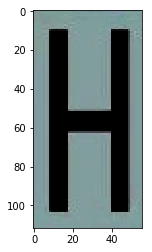

In [13]:
plt.imshow(img_corrected)

In [14]:
#rotation rotated 15 degree
i=0
from skimage.color import rgb2gray
for p in range(0,NUMBEROFIMAGE_DATA):
    img = Images[i]
    
    for j in range(1,21):#max 45
        random_factor = random.uniform(-30,30)
        img_copy = img/255.0000
        
        img_rotated=rotate(img_copy,random_factor,resize=False)
        
        img_rotated15 = (img_rotated)
    
        filename=total_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_rotate_'+'_'+str(int(random_factor))+'.jpg'
        plt.imsave(filename, img_rotated15)
        totalImages = 1 + totalImages
        #print(filename)
    i+=1
print(totalImages)


3200


In [15]:
# img=Images[4]
# img_rotated=rotate(img,-30,resize=True)

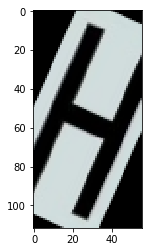

In [16]:
plt.imshow(img_rotated15)

In [17]:
#translation


from skimage import transform as transform
i=0
for p in range(0,NUMBEROFIMAGE_DATA):
    img = Images[i]/255.0000
    
    for j in range(1,6):#max 45
        random_H = random.uniform(-HEIGHT/10,HEIGHT/10)
        random_W = random.uniform(-WIDTH/10,WIDTH/10)
        tform = transform.SimilarityTransform(scale=1, rotation=0,
                               translation=(random_W, random_H))
        
        
        img_translationing=transform.warp(img,tform)
        img_translation = img_translationing
        H_index = str(int(random_H))
        W_index = str(int(random_W))

        
    
        filename=total_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_translation_'+'_'+H_index+'_'+W_index+'.jpg'
        plt.imsave(filename, img_translation)
        totalImages = 1 + totalImages
        #print(filename)
    i+=1
print(totalImages)


3360


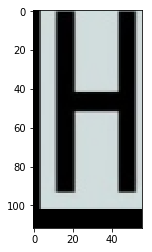

In [18]:
# img = Images[7]/255.0000
# tform = transform.SimilarityTransform(scale=1, rotation=0,
#                                translation=(16, 1))
        
        
# img_translationing=transform.warp(img,tform)
plt.imshow(img_translationing)

In [19]:
#shear
i=0
for p in range(0,NUMBEROFIMAGE_DATA):
    img = Images[i]/255.0000
    for j in range(0,20):#50 degree max
        random_factor = random.uniform(-0.1,0.1)
  
        
        tform = transform.AffineTransform(scale=(1.0, 1.0), rotation=0, shear=random_factor,
                        translation=(0, 0))
        img_shearing=transform.warp(img,tform)
        img_sheared = img_shearing
        shear_index = str(int(random_factor*100))

        
    
    
        filename=total_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_sheared_'+'_00'+shear_index+'.jpg'
        plt.imsave(filename, img_sheared)
        totalImages = 1 + totalImages
        #print(filename)
    
    i+=1
print(totalImages)
    

4000


In [20]:
# img=Images[0]
# tform = transform.AffineTransform(scale=(1.0, 1.0), rotation=0, shear=0.1,
#                 translation=(0, 0))
# img_shearing=transform.warp(img,tform)
# img_sheared = img_shearing

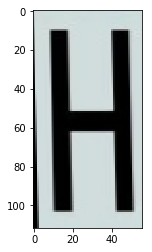

In [21]:
plt.imshow(img_sheared)

In [22]:
#affine
i=0
for p in range(0,NUMBEROFIMAGE_DATA):
    img = Images[i]/255.0
    for j in range(0,100):#50 degree max
        scale_factor_h = round(random.uniform(0.9,1.5),2)
        scale_factor_w = round(random.uniform(0.9,1.5),2)
        rotation_factor = round(random.uniform(-20,20),2)
        shear_factor = round(random.uniform(-0.1,0.1),2)

        translation_factorH = int(random.uniform(-HEIGHT/10,HEIGHT/10))
        translation_factorW = int(random.uniform(-WIDTH/10,WIDTH/10))
        
        tform = transform.AffineTransform(scale=(scale_factor_h, scale_factor_w), rotation=rotation_factor/255.0, shear=shear_factor, translation=(translation_factorW, translation_factorH))
        img_affining=transform.warp(img,tform)
        img_affined = img_affining*1.00
        shear_index = str(round(random_factor,2))
        

        
    
    
        filename=total_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_affined_shear'+'_00'+str(shear_index)+'_sx_'+str(scale_factor_w)+'_sy_'+str(scale_factor_h)+ '_r_'+str(rotation_factor)+'_th_'+str(translation_factorH)+'_tw_'+str(translation_factorW)+'.jpg'
        plt.imsave(filename, img_affined)
        totalImages = 1 + totalImages
        #print(filename)
    
    i+=1
print(totalImages)

7200


In [23]:
#scale_factor_h,scale_factor_w

In [24]:
#rotation_factor

In [25]:
#img_affining=transform.warp(img,tform)

In [26]:
#shear_factor

In [27]:
#translation_factorW, translation_factorH

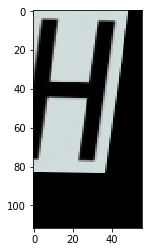

In [28]:
# img=Images[0]
# tform = transform.AffineTransform(scale=(1, 1), rotation=30/255.0, shear=0, translation=(0, 0))
# img_affining=transform.warp(img,tform)
# img_affined = img_affining*1.00
plt.imshow(img_affined)

In [29]:
#perspective
from skimage import transform as trans
i=0
for p in range(0,NUMBEROFIMAGE_DATA):
    img = Images[i]/255.0000
    for j in range(0,100):#50 degree max
        src_top_left=[0,0]
        src_bottom_left=[0,HEIGHT]
        src_bottom_right=[WIDTH,HEIGHT]
        src_top_right=[WIDTH,0]
        
        TL_h=random.uniform(0,WIDTH/6)
        TL_v=random.uniform(0,HEIGHT/6)
        BL_h=random.uniform(0,WIDTH/6)
        BL_v=HEIGHT-random.uniform(0,HEIGHT/6)
        BR_h=WIDTH-random.uniform(0,WIDTH/6)
        BR_v=HEIGHT-random.uniform(0,HEIGHT/6)
        TR_h=WIDTH-random.uniform(0,WIDTH/6)
        TR_v=random.uniform(0,HEIGHT/6)
#         dst_top_left=[random.uniform(0,WIDTH/4),random.uniform(0,HEIGHT/4)]
#         dst_bottom_left=[random.uniform(0,WIDTH/4),HEIGHT-random.uniform(0,HEIGHT/4)]
#         dst_bottom_right=[WIDTH-random.uniform(0,WIDTH/4),HEIGHT-random.uniform(0,HEIGHT/4)]
#         dst_top_rightt=[WIDTH-random.uniform(0,WIDTH/4),random.uniform(0,HEIGHT/4)]
        dst_top_left=[TL_h,TL_v]
        dst_bottom_left=[BL_h,BL_v]
        dst_bottom_right=[BR_h,BR_v]
        dst_top_right=[TR_h,TR_v]     
        
        src = np.array([src_top_left,src_bottom_left,src_bottom_right,src_top_right])
        dst = np.array([dst_top_left,dst_bottom_left,dst_bottom_right,dst_top_right])
        
        tform = trans.ProjectiveTransform()
        tform.estimate(src, dst)
        perspective_warped = trans.warp(img, tform, output_shape=(HEIGHT, WIDTH))
      

        
    
    
        filename=total_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_perspective'+'_'+str(int(TL_h))+'_'+str(int(TL_v))+'_'+str(int(BL_h))+'_'+str(int(BL_v))+'_'+str(int(BR_h))+'_'+str(int(BR_v))+'_'+str(int(TR_h))+'_'+str(int(TR_v))+'.jpg'
        plt.imsave(filename, perspective_warped)
        totalImages = 1 + totalImages
        #print(filename)
    
    i+=1
print(totalImages)

10400


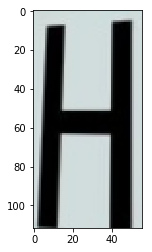

In [30]:
plt.imshow(perspective_warped)

In [31]:
#gaussian noise

i=0
for p in range(0,NUMBEROFIMAGE_DATA):
    img = Images[i]
    
    for j in range(0,80):#max 45
        random_factor1 = random.uniform(0,0)
        #parameter sigma = 1%-30%
        sigma_factor = random.uniform(0.01,0.1)
        gaussian_img=skimage.util.random_noise(img,mode='gaussian',var=sigma_factor)
        record_factor=str(round(sigma_factor,3)**100)
        
        
    
        filename=total_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_gaussian_'+'sigma_'+record_factor+'.jpg'
        plt.imsave(filename, gaussian_img)
        totalImages = 1 + totalImages
        #print(filename)
    i+=1

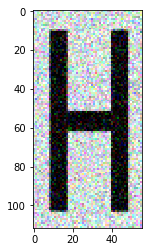

In [32]:
# sigma_factor = 0.1
# gaussian_img=skimage.util.random_noise(img,mode='gaussian',var=sigma_factor)
plt.imshow(gaussian_img)

In [33]:
sigma_factor

0.023079254933760174

In [34]:
from skimage.color import rgb2gray

In [35]:
#salt&pepper noise
i=0
for p in range(0,NUMBEROFIMAGE_DATA):
    img = Images[i]
    
    for j in range(0,80):#max 45
        #Proportion of image pixels to replace with noise 1%~50%
        amount_factor = random.uniform(0.01,0.1)
        #pepper salt noise ratio random from 30%-70% 
        salt_vs_pepper_factor = random.uniform(0.3,0.7)
        s_p_image=skimage.util.random_noise(img,mode='s&p',salt_vs_pepper=salt_vs_pepper_factor,amount=amount_factor)
        
        
    
        filename=total_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_salt&pepper_'+'amount_'+str(round(amount_factor,2))+'ratio of s&p_'+str((round(salt_vs_pepper_factor,2)))+'.jpg'
        plt.imsave(filename, s_p_image)
        #print(filename)
        totalImages = 1 + totalImages
    i+=1

In [36]:
amount_factor

0.0809114909866546

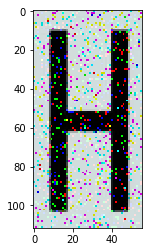

In [37]:
# amount_factor = 0.2
# #pepper salt noise ratio random from 30%-70% 
# salt_vs_pepper_factor = random.uniform(0.3,0.7)
# s_p_image=skimage.util.random_noise(img,mode='s&p',salt_vs_pepper=salt_vs_pepper_factor,amount=amount_factor)
plt.imshow(s_p_image)

In [38]:
#salt noise
i=0
for p in range(0,NUMBEROFIMAGE_DATA):
    img = Images[i]
    
    for j in range(0,50):#max 45
        #Proportion of image pixels to replace with noise 1%~50%
        amount_factor = random.uniform(0.01,0.15)
        salt_image=skimage.util.random_noise(img,mode='salt',amount=amount_factor)
        filename=total_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_saltnoise_'+'amount_'+str(round(amount_factor,3)**100)+'.jpg'
        plt.imsave(filename, salt_image)
        totalImages = 1 + totalImages
        #print(filename)
    i+=1

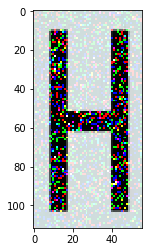

In [39]:
plt.imshow(salt_image)

In [40]:
#pepper noise
i=0
for p in range(0,NUMBEROFIMAGE_DATA):
    img = Images[i]
    
    for j in range(0,50):#max 45
        #Proportion of image pixels to replace with noise 1%~50%
        amount_factor = random.uniform(0.01,0.15)
        pepper_image=skimage.util.random_noise(img,mode='pepper',amount=amount_factor)  
        filename=total_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_peppernoise_'+'amount_'+str(round(amount_factor,3)*100)+'.jpg'
        plt.imsave(filename, pepper_image)
        totalImages = 1 + totalImages
        #print(filename)
    i+=1

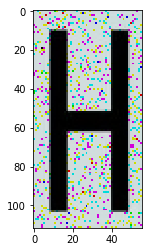

In [41]:
plt.imshow(pepper_image)

In [42]:
#possion noise
import random
i=0
for p in range(0,NUMBEROFIMAGE_DATA):
    img = Images[i]
    image = img.astype(float)
    
    for j in range(0,80):#max 45
        #possion lamda
        lamda_factor = random.uniform(10,30)
        possion_img=image+(np.random.poisson(lam=lamda_factor, size=img.shape) )
        possion_image = (possion_img* 1).astype(np.uint8)
        filename=total_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_possionnoise_'+str(j)+'lamda_'+str(int(lamda_factor))+'.jpg'
        plt.imsave(filename, possion_image)
        totalImages = 1 + totalImages
        #print(filename)
    i+=1

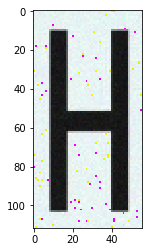

In [43]:
# img = Images[0]
# image = img.astype(float)
# lamda_factor =30
# possion_img=image+(np.random.poisson(lam=lamda_factor, size=img.shape) )
# possion_image = (possion_img* 1).astype(np.uint8)
plt.imshow(possion_image)

In [44]:
#speckle noise

i=0
for p in range(0,NUMBEROFIMAGE_DATA):
    img = Images[i]
    
    
    for j in range(0,80):#max 45
        #sigma random from 0 to 30%
        
        speckle_factor = random.uniform(0.01,0.1)
        speckle_img=skimage.util.random_noise(img,mode='speckle',mean=0,var=speckle_factor)
        
        #file factor*1000 and save
        filename=total_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_specklenoise_'+str(j)+'sigma_'+str(int(speckle_factor*100))+'.jpg'
        plt.imsave(filename, speckle_img)
        totalImages = 1 + totalImages
        #print(filename)
    i+=1

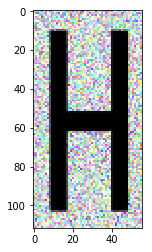

In [45]:
# speckle_factor = 0.01
# speckle_img=skimage.util.random_noise(img,mode='speckle',mean=0,var=speckle_factor)
plt.imshow(speckle_img)

In [46]:
##########################################test noise
#cc=skimage.util.random_noise(pp,mode='s&p',salt_vs_pepper=1,amount=0.01)

In [47]:
#plt.imshow(cc)

In [48]:
#ppp=rgb2gray(cc)

In [49]:
#plt.imshow(ppp)

In [50]:
#zz=(np.random.poisson(lam=0, size=cc.shape) )/255

In [51]:
#np.max(zz)

In [52]:
#cc= Images[0]
#c = cc.astype(float)



In [53]:
#seed = 42


#cc=skimage.util.random_noise(pp,mode='poisson',clip=0.1,seed=seed)
#c += (np.random.poisson(lam=100, size=cc.shape) )


In [54]:
#plt.imshow(c1)
#plt.imshow((c * 1).astype(np.uint8))



In [55]:
a = []

In [56]:
for i in range(1,10000):
    a.append(random.uniform(1,10))

(array([1013.,  977.,  995.,  980.,  954., 1013., 1011., 1002.,  992.,
        1062.]),
 array([1.00144036, 1.90121109, 2.80098181, 3.70075253, 4.60052325,
        5.50029397, 6.40006469, 7.29983541, 8.19960613, 9.09937686,
        9.99914758]),
 <a list of 10 Patch objects>)

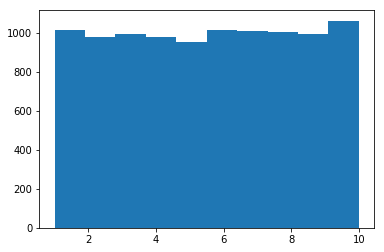

In [57]:
plt.hist(a)

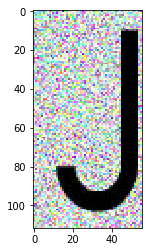

In [58]:


cc=skimage.util.random_noise(Images[0],mode='speckle',mean=0,var=0.1)
plt.imshow(cc)
   

In [59]:
#blurring
i=0
for p in range(0,NUMBEROFIMAGE_DATA):
    img = Images[i]
    
    
    
    for j in range(0,5):
        #random configure the kernel parameter
        #set window from 2 to width/2
        
        h_factor = random.uniform(2,WIDTH/6)
        w_factor = random.uniform(2,WIDTH/6)
        random_factor1=np.random.random((int(h_factor),int(w_factor)))
        kernel = random_factor1/np.sum(random_factor1)
        
        random_blur = cv2.filter2D(img,-1,kernel)
        
    
        filename=total_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_random_bluring_h_'+str(int(h_factor))+'_w_'+str(int(w_factor))+'.jpg'
        plt.imsave(filename, random_blur)
        totalImages = 1 + totalImages
        #print(filename)
    i+=1

In [60]:
random_factor1.shape

(8, 8)

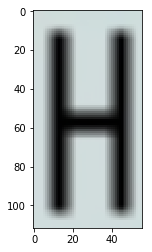

In [61]:
plt.imshow(random_blur)

In [62]:
#blurring average
i=0

for p in range(0,NUMBEROFIMAGE_DATA):
    img = Images[i]
    
    
    
    for j in range(0,5):
        #from window 2-col/3
        random_factor_h=np.random.randint(2,WIDTH/6)
        random_factor_w=np.random.randint(2,WIDTH/6)
        #print(random_factor1)
        #print(random_factor2)
        
        random_factor3 = np.ones((random_factor_h,random_factor_w),np.float32)
       
        kernel = random_factor3/np.sum(random_factor3)
        
        average_blur = cv2.filter2D(img,-1,kernel)
        
    
        filename=total_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_average_bluring_h_'+str(random_factor_h)+'_w_'+str(random_factor_w)+'.jpg'
        plt.imsave(filename, average_blur)
        totalImages = 1 + totalImages
        #print(filename)
    i+=1

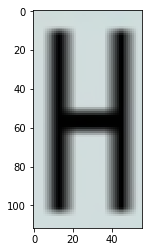

In [63]:
plt.imshow(average_blur)

In [64]:
#blurring gaussian
from scipy.ndimage import gaussian_filter

i=0

for p in range(0,NUMBEROFIMAGE_DATA):
    img = Images[i]
    
    
    
    for j in range(0,5):
        #sigma = 0-10
        random_factor_sigma=np.random.uniform(0,10)
 
      
  
        
        sigma_factor = str(round(random_factor_sigma,2))
        gaussian_blur = skimage.filters.gaussian(img,sigma=random_factor_sigma)
    
        
    
        filename=total_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_gaussian_bluring_sigma'+sigma_factor+'.jpg'
        plt.imsave(filename, gaussian_blur)
        totalImages = 1 + totalImages
        #print(filename)
    i+=1

/usr/local/lib/python3.5/dist-packages/skimage/filters/_gaussian.py:108: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))


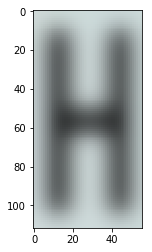

In [65]:
plt.imshow(gaussian_blur)

In [66]:
sigma_factor

'6.08'

In [67]:
#blurring median
i=0

for p in range(0,NUMBEROFIMAGE_DATA):
    img = Images[i]
    
    
    
    for j in range(0,5):
        

        random_factor=np.random.randint(1,WIDTH/6)

        #windwo 1 ~ width/3
        
        median_blur = ndimage.median_filter(img,  size=random_factor)
        
    
        
    
        filename=total_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_median_bluring_'+str(random_factor)+'.jpg'
        plt.imsave(filename, median_blur)
        totalImages = 1 + totalImages
        #print(filename)
    i+=1

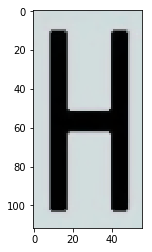

In [68]:
plt.imshow(median_blur)

In [69]:

#blurring minima
i=0

for p in range(0,NUMBEROFIMAGE_DATA):
    img = Images[i]
    
    
    
    for j in range(0,5):
       
        random_factor_size=np.random.uniform(2,WIDTH/6)
        factor = str(round(random_factor_size,0))
    
        minimum_blur = ndimage.minimum_filter(img,  size=random_factor_size)

        filename=total_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_minimum_bluring_factor_'+factor+'.jpg'
        plt.imsave(filename, minimum_blur)
        totalImages = 1 + totalImages
        #print(filename)
    i+=1

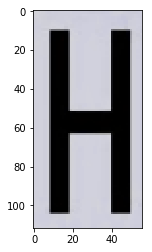

In [70]:
plt.imshow(minimum_blur)

In [71]:
#blurring maximum
i=0

for p in range(0,NUMBEROFIMAGE_DATA):
    img = Images[i]
    
    
    
    for j in range(0,5):
        
        random_factor_size=np.random.uniform(1,WIDTH/6)
        factor = str(round(random_factor_size,0))
     
  
        
        
        maximum_blur = ndimage.maximum_filter(img,  size=random_factor_size)
        
        #gaussian_blur = cv2.GaussianBlur(img,(random_factor2,random_factor2),0)
        
    
        filename=total_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_maximum_bluring_size'+factor+'.jpg'
        plt.imsave(filename, maximum_blur)
        totalImages = 1 + totalImages
        #print(filename)
    i+=1

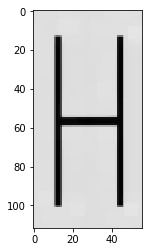

In [72]:
plt.imshow(maximum_blur)

In [73]:
#blurring bilateral
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
i=0

for p in range(0,NUMBEROFIMAGE_DATA):
    img = Images[i]
    
    
    
    for j in range(0,5):
        
        random_factor_color=np.random.uniform(0.01,10)
        random_factor_sigma_spatial=np.random.randint(1,WIDTH/6)
        
        random_factor_c= str(round(random_factor_color))
        random_factor_s=str(round(random_factor_sigma_spatial))
        
       
       
        
        bilateral_blur = denoise_bilateral(img,sigma_color=random_factor_color,sigma_spatial=random_factor_sigma_spatial)
        
    
        filename=total_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_bilateral_bluring_color'+random_factor_c+'spatial_'+random_factor_s+'.jpg'
        plt.imsave(filename, bilateral_blur)
        totalImages = 1 + totalImages
        #print(filename)
    i+=1

/usr/local/lib/python3.5/dist-packages/skimage/restoration/_denoise.py:78: UserWarning: denoise_bilateral will default to multichannel=False in v0.15
  warn('denoise_bilateral will default to multichannel=False in v0.15')


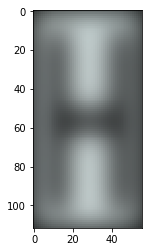

In [74]:
plt.imshow(bilateral_blur)

In [75]:
#blurring percentile
i=0

for p in range(0,NUMBEROFIMAGE_DATA):
    img = Images[i]
    
    
    
    for j in range(0,20):
        
        random_factor_percentile=np.random.randint(1,100)
        random_factor_size=np.random.randint(2,WIDTH/6)
        #print(random_factor1)
        #print(random_factor2)
  
        
        
        percentile_blur = ndimage.percentile_filter(img, percentile=random_factor_percentile, size=random_factor_size)
        
        #gaussian_blur = cv2.GaussianBlur(img,(random_factor2,random_factor2),0)
        
    
        filename=total_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_percentile_bluring_percentile_'+str(random_factor_percentile)+'_size_'+str(random_factor_size)+'.jpg'
        plt.imsave(filename, percentile_blur)
        totalImages = 1 + totalImages
        #print(filename)
    i+=1

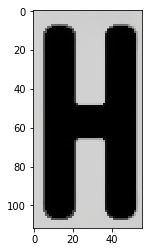

In [76]:
plt.imshow(ndimage.percentile_filter(img, percentile=10, size=10))

In [77]:
totalImages

25600